In [1]:
import pandas as pd
import datetime

In [2]:
file="pollution_us.csv"
#Empezamos con la limpieza de la informacion seleccionando las variables mas importantes
pullution_df = pd.read_csv(file)
print(pullution_df.columns.values)
pullution_df.head()

['Unnamed: 0' 'State Code' 'County Code' 'Site Num' 'Address' 'State'
 'County' 'City' 'Date Local' 'NO2 Units' 'NO2 Mean' 'NO2 1st Max Value'
 'NO2 1st Max Hour' 'NO2 AQI' 'O3 Units' 'O3 Mean' 'O3 1st Max Value'
 'O3 1st Max Hour' 'O3 AQI' 'SO2 Units' 'SO2 Mean' 'SO2 1st Max Value'
 'SO2 1st Max Hour' 'SO2 AQI' 'CO Units' 'CO Mean' 'CO 1st Max Value'
 'CO 1st Max Hour' 'CO AQI']


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
pullution_df=pullution_df[['State','City','Date Local','NO2 Units','NO2 1st Max Value', 'O3 Units', 'O3 Mean', 'O3 1st Max Value', 'SO2 Units' ,'SO2 Mean', 'SO2 1st Max Value', 'CO Units' ,'CO Mean' ,'CO 1st Max Value']]

In [4]:
pullution_df.isnull().sum()

State                0
City                 0
Date Local           0
NO2 Units            0
NO2 1st Max Value    0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
CO Units             0
CO Mean              0
CO 1st Max Value     0
dtype: int64

In [5]:
pullution_df.describe()

,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06
mean,2.541485e+01,2.612485e-02,3.920331e-02,1.870364e+00,4.492185e+00,3.682177e-01,6.201067e-01
std,1.599963e+01,1.136974e-02,1.534362e-02,2.760435e+00,7.679866e+00,3.140231e-01,6.439361e-01
min,-2.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,-4.375000e-01,-4.000000e-01
25%,1.300000e+01,1.787500e-02,2.900000e-02,2.565220e-01,8.000000e-01,1.834580e-01,2.920000e-01
50%,2.400000e+01,2.587500e-02,3.800000e-02,9.875000e-01,2.000000e+00,2.926250e-01,4.000000e-01
75%,3.570000e+01,3.391700e-02,4.800000e-02,2.325000e+00,5.000000e+00,4.666670e-01,8.000000e-01
max,2.670000e+02,9.508300e-02,1.410000e-01,3.216250e+02,3.510000e+02,7.508333e+00,1.990000e+01


In [6]:
pullution_df['Date Local'] = pd.to_datetime(pullution_df['Date Local'])
pullution_df['Year'] = pullution_df['Date Local'].map(lambda x: x.year)


In [7]:
groupstate=pullution_df[['State','City','NO2 Units','NO2 1st Max Value','O3 Mean','O3 1st Max Value','SO2 Mean','SO2 1st Max Value','CO Mean','CO 1st Max Value','Year']].groupby(['Year','State']).mean()

In [8]:
groupstate.head(100)

NO2 1st Max Value   O3 Mean  O3 1st Max Value  \
Year State                                                                 
2000 Arizona                       52.800228  0.023655          0.042858   
     California                    31.667146  0.023675          0.036492   
     Colorado                      34.597260  0.017066          0.032367   
     District Of Columbia          39.472527  0.017567          0.030893   
     Florida                       27.078652  0.026261          0.042879   
...                                      ...       ...               ...   
2004 Missouri                      29.030233  0.025585          0.041609   
     New Hampshire                 20.206522  0.026898          0.039701   
     New Jersey                    33.912482  0.021934          0.035534   
     New York                      35.182244  0.021117          0.032820   
     North Carolina                24.866029  0.030785          0.050299   

                           SO2 Mean  SO2 1st Max Value   CO Mean  \
Year State                                                         
2000 Arizona               2.303226           4.718629  0.745756   
     California            1.721004           3.703067  0.644488   
     Colorado              2.138058          11.808219  0.611388   
     District Of Columbia  8.137540          15.443132  1.175696   
     Florida               1.973912           4.522472  0.725072   
...                             ...                ...       ...   
2004 Missouri              3.418997          11.749186  0.550480   
     New Hampshire         2.356117           6.156522  0.256236   
     New Jersey            5.605666          10.772956  0.518082   
     New York              6.997805          13.883305  0.436545   
     North Carolina        2.369894          10.209689  0.429905   

                           CO 1st Max Value  
Year State                                   
2000 Arizona                       1.687656  
     California                    1.196999  
     Colorado                      1.289315  
     District Of Columbia          1.851648  
     Florida                       1.029354  
...                                     ...  
2004 Missouri                      0.833488  
     New Hampshire                 0.413043  
     New Jersey                    0.788235  
     New York                      0.676005  
     North Carolina                0.629378  

[100 rows x 7 columns]

In [9]:
file2="fire_base.csv"
fire_df=pd.read_csv(file2)
fire_df.head()

C:\Users\zAbyx\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [10]:
fire_df.count()

OBJECTID                      1880465
FOD_ID                        1880465
FPA_ID                        1880465
SOURCE_SYSTEM_TYPE            1880465
SOURCE_SYSTEM                 1880465
NWCG_REPORTING_AGENCY         1880465
NWCG_REPORTING_UNIT_ID        1880465
NWCG_REPORTING_UNIT_NAME      1880465
SOURCE_REPORTING_UNIT         1880465
SOURCE_REPORTING_UNIT_NAME    1880465
LOCAL_FIRE_REPORT_ID           421179
LOCAL_INCIDENT_ID             1059644
FIRE_CODE                      324724
FIRE_NAME                      919986
ICS_209_INCIDENT_NUMBER         25717
ICS_209_NAME                    25717
MTBS_ID                         11003
MTBS_FIRE_NAME                  11003
COMPLEX_NAME                     5183
FIRE_YEAR                     1880465
DISCOVERY_DATE                1880465
DISCOVERY_DOY                 1880465
DISCOVERY_TIME                 997827
STAT_CAUSE_CODE               1880465
STAT_CAUSE_DESCR              1880465
CONT_DATE                      988934
CONT_DOY    

In [11]:
new_fire_df=fire_df[["FIRE_YEAR","STATE","OBJECTID"]].groupby(["FIRE_YEAR","STATE"]).count()
new_fire_df=new_fire_df.reset_index()
new_fire_df.head()

,FIRE_YEAR,STATE,OBJECTID
0,1992,AK,481
1,1992,AL,93
2,1992,AR,128
3,1992,AZ,3494
4,1992,CA,10833


In [12]:
file3="data.csv"
statescode=pd.read_csv(file3)
statescode.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [13]:
fire_df=pd.merge(new_fire_df,statescode,how = 'inner',left_on="STATE",right_on="Code")
fire_df=fire_df[["FIRE_YEAR","State","OBJECTID"]]

In [14]:
groupstate=groupstate.reset_index()
groupstate.head()

,Year,State,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value
0,2000,Arizona,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656
1,2000,California,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999
2,2000,Colorado,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315
3,2000,District Of Columbia,39.472527,0.017567,0.030893,8.137540,15.443132,1.175696,1.851648
4,2000,Florida,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354


In [15]:
groupstate["key"]=groupstate["Year"].map(str) + groupstate["State"]
fire_df["Key"]=fire_df["FIRE_YEAR"].map(str) + fire_df["State"]

In [16]:
newdata_states=pd.merge(groupstate,fire_df,how = 'inner',left_on="key",right_on="Key")

In [19]:
print(newdata_states.columns.values)
newdata_states=newdata_states[['Year','State_x', 'NO2 1st Max Value', 'O3 Mean', 'O3 1st Max Value','SO2 Mean', 'SO2 1st Max Value', 'CO Mean', 'CO 1st Max Value','OBJECTID']]
newdata_states.head()

['Year' 'State_x' 'NO2 1st Max Value' 'O3 Mean' 'O3 1st Max Value'
 'SO2 Mean' 'SO2 1st Max Value' 'CO Mean' 'CO 1st Max Value' 'OBJECTID']


,Year,State_x,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,OBJECTID
0,2000,Arizona,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656,3859
1,2000,California,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999,6977
2,2000,Colorado,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315,1619
3,2000,Florida,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354,6499
4,2000,Illinois,44.416193,0.017105,0.028007,6.064269,15.464915,0.702893,1.112642,29


In [20]:
newdata_states=newdata_states.rename(columns={"State_x": "State", "OBJECTID": "Wildfires"})

In [21]:
newdata_states.head()

,Year,State,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires
0,2000,Arizona,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656,3859
1,2000,California,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999,6977
2,2000,Colorado,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315,1619
3,2000,Florida,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354,6499
4,2000,Illinois,44.416193,0.017105,0.028007,6.064269,15.464915,0.702893,1.112642,29


In [40]:
file4 = "population.csv"
population = pd.read_csv(file4)
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,Alabama,4779736,4780125,4785437,4799069,4815588,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,40,4,9,2,Alaska,710231,710249,713910,722128,730443,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
2,40,4,8,4,Arizona,6392017,6392288,6407172,6472643,6554978,...,12.609078,4.278167,6.899802,6.376679,9.168478,9.597577,11.964782,10.878879,12.962934,13.687161
3,40,3,7,5,Arkansas,2915918,2916031,2921964,2940667,2952164,...,0.834503,3.294766,0.827785,0.057853,-0.091449,1.075446,1.486269,2.009593,0.958896,0.923429
4,40,4,9,6,California,37253956,37254519,37319502,37638369,37948800,...,-5.151429,1.276797,1.495016,1.649031,2.203551,1.984957,0.500044,-0.629909,-2.130954,-3.276681


In [59]:
population_g=population[["NAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015","POPESTIMATE2016"]]
population_g=population_g.rename(columns={"POPESTIMATE2010": "2010",
                                              "POPESTIMATE2011": "2011",
                                              "POPESTIMATE2012": "2012",
                                              "POPESTIMATE2013": "2013",
                                              "POPESTIMATE2014": "2014",
                                              "POPESTIMATE2015": "2015",
                                              "POPESTIMATE2016": "2016",
                                             })
population_g.head()

,NAME,2010,2011,2012,2013,2014,2015,2016
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525
1,Alaska,713910,722128,730443,737068,736283,737498,741456
2,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072
3,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918
4,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117


In [60]:
population_append=pd.melt(population_g,id_vars=["NAME"], value_vars=['2010', '2011','2012','2013','2014','2015','2016'])
population_append

,NAME,variable,value
0,Alabama,2010,4785437
1,Alaska,2010,713910
2,Arizona,2010,6407172
3,Arkansas,2010,2921964
4,California,2010,37319502
...,...,...,...
359,Washington,2016,7294771
360,West Virginia,2016,1831023
361,Wisconsin,2016,5772628
362,Wyoming,2016,584215


In [63]:
population_append["Key"]=population_append["variable"].map(str) + population_append["NAME"]
population_append.head()

,NAME,variable,value,Key
0,Alabama,2010,4785437,2010Alabama
1,Alaska,2010,713910,2010Alaska
2,Arizona,2010,6407172,2010Arizona
3,Arkansas,2010,2921964,2010Arkansas
4,California,2010,37319502,2010California


In [66]:
newdata_states["Key"]=newdata_states["Year"].map(str) + newdata_states["State"]
newdata_states.head()

,Year,State,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,Key
0,2000,Arizona,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656,3859,2000Arizona
1,2000,California,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999,6977,2000California
2,2000,Colorado,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315,1619,2000Colorado
3,2000,Florida,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354,6499,2000Florida
4,2000,Illinois,44.416193,0.017105,0.028007,6.064269,15.464915,0.702893,1.112642,29,2000Illinois


In [67]:
data_df=pd.merge(newdata_states,population_append,how = 'inner',left_on="Key",right_on="Key")
data_df.head()

,Year,State,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,Key,NAME,variable,value
0,2010,Arizona,33.981276,0.025903,0.043353,1.047033,1.999018,0.365168,0.697395,1617,2010Arizona,Arizona,2010,6407172
1,2010,Arkansas,23.138889,0.027650,0.041337,1.292494,2.168403,0.454634,0.605972,2220,2010Arkansas,Arkansas,2010,2921964
2,2010,California,23.389085,0.025669,0.037684,0.720866,1.467768,0.344747,0.572430,5776,2010California,California,2010,37319502
3,2010,Colorado,33.061321,0.022955,0.037774,1.028090,4.286439,0.365696,0.685613,2694,2010Colorado,Colorado,2010,5047349
4,2010,Connecticut,21.720350,0.027474,0.039643,0.949623,2.499313,0.279957,0.400370,418,2010Connecticut,Connecticut,2010,3579114


In [71]:
print(data_df.columns.values)
data_df=data_df[['Year','State','NO2 1st Max Value','O3 Mean','O3 1st Max Value','SO2 Mean','SO2 1st Max Value','CO Mean','CO 1st Max Value','Wildfires','value']]
data_df=data_df.rename(columns={"value": "population"})
data_df.head()

['Year' 'State' 'NO2 1st Max Value' 'O3 Mean' 'O3 1st Max Value'
 'SO2 Mean' 'SO2 1st Max Value' 'CO Mean' 'CO 1st Max Value' 'Wildfires'
 'value']


,Year,State,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,population
0,2010,Arizona,33.981276,0.025903,0.043353,1.047033,1.999018,0.365168,0.697395,1617,6407172
1,2010,Arkansas,23.138889,0.027650,0.041337,1.292494,2.168403,0.454634,0.605972,2220,2921964
2,2010,California,23.389085,0.025669,0.037684,0.720866,1.467768,0.344747,0.572430,5776,37319502
3,2010,Colorado,33.061321,0.022955,0.037774,1.028090,4.286439,0.365696,0.685613,2694,5047349
4,2010,Connecticut,21.720350,0.027474,0.039643,0.949623,2.499313,0.279957,0.400370,418,3579114


In [72]:
import numpy as np
import matplotlib.pyplot as plt

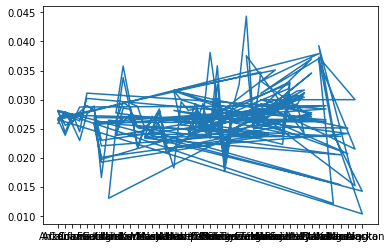

In [79]:
plt.plot(data_df["State"],data_df["O3 Mean"])